In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread(r"C:\Users\deepe\Downloads\1.jpg",cv2.IMREAD_GRAYSCALE)
sobel_x=cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobel_y=cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
magnitude=cv2.magnitude(sobel_x,sobel_y)

(-0.5, 1919.5, 1199.5, -0.5)

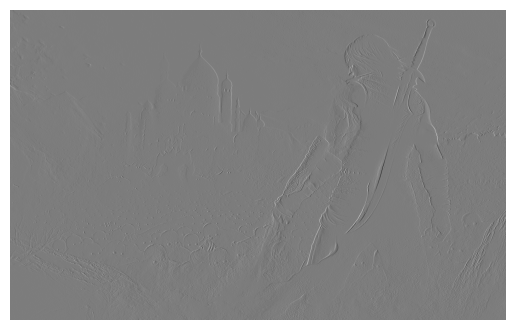

In [6]:
plt.imshow(sobel_x,cmap='gray')
plt.axis('off')

(-0.5, 1919.5, 1199.5, -0.5)

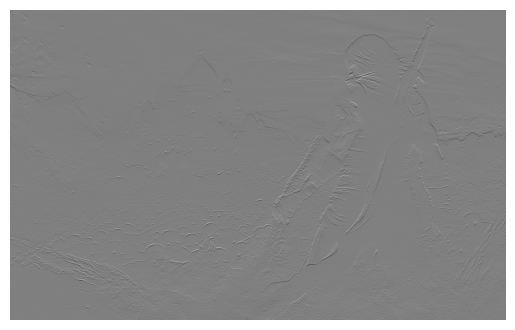

In [7]:
plt.imshow(sobel_y,cmap='gray')
plt.axis('off')

(-0.5, 1919.5, 1199.5, -0.5)

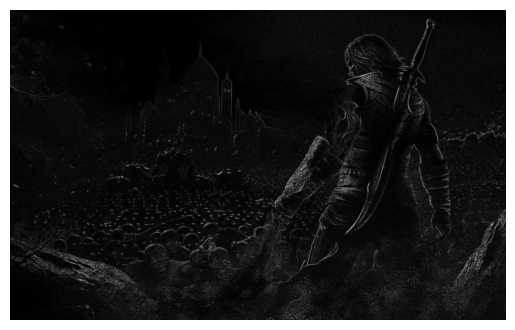

In [8]:
plt.imshow(magnitude,cmap='gray')
plt.axis('off')

(-0.5, 1919.5, 1199.5, -0.5)

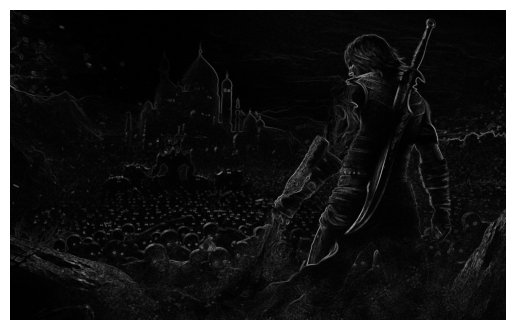

In [9]:
smoothed_image=cv2.GaussianBlur(image,(5,5),0)
sobel_x_smoothed=cv2.Sobel(smoothed_image,cv2.CV_64F,1,0,ksize=3)
sobel_y_smoothed=cv2.Sobel(smoothed_image,cv2.CV_64F,0,1,ksize=3)
magnitude_smoothed=cv2.magnitude(sobel_x_smoothed,sobel_y_smoothed)
plt.imshow(magnitude_smoothed,cmap='gray')
plt.axis('off')

Text(0.5, 1.0, 'Images with Keypoints')

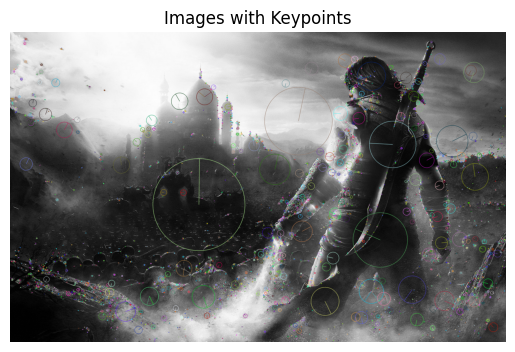

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image=cv2.imread(r"C:\Users\deepe\Downloads\1.jpg",cv2.IMREAD_GRAYSCALE)
sift=cv2.SIFT_create()
keypoints=sift.detect(image,None)
keypoints,descriptors=sift.compute(image,keypoints)
images_with_keypoints=cv2.drawKeypoints(image,keypoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(images_with_keypoints,cmap='gray')
plt.axis('off')
plt.title('Images with Keypoints')

In [11]:
pip install ultralytics


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\deepe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
from ultralytics import YOLO
model=YOLO('yolov8n.pt')
results=model(r"C:\Users\deepe\Downloads\image1.jpg")
result=results[0]
result.show()

100%|██████████| 6.25M/6.25M [00:01<00:00, 5.72MB/s]



image 1/1 C:\Users\deepe\Downloads\image1.jpg: 448x640 4 persons, 2 chairs, 1 tv, 2 laptops, 364.0ms
Speed: 20.5ms preprocess, 364.0ms inference, 17.1ms postprocess per image at shape (1, 3, 448, 640)


In [13]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\deepe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\deepe\AppData\Local\Temp\ipykernel_8672\602881532.py:9: RuntimeWarning: invalid value encountered in divide
  lbp_nor=(lbp_image/lbp_image*255).astype("uint8")
C:\Users\deepe\AppData\Local\Temp\ipykernel_8672\602881532.py:9: RuntimeWarning: invalid value encountered in cast
  lbp_nor=(lbp_image/lbp_image*255).astype("uint8")


Text(0.5, 1.0, 'LBP_normailized')

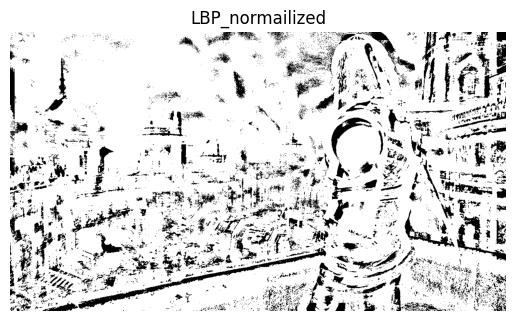

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.feature import local_binary_pattern
image=cv2.imread(r"C:\Users\deepe\Downloads\2.jpg",cv2.IMREAD_GRAYSCALE)
radius=3
n_points=radius*8
lbp_image=local_binary_pattern(image,radius,n_points,method='uniform')
lbp_nor=(lbp_image/lbp_image*255).astype("uint8")
plt.imshow(lbp_nor,cmap="gray")
plt.axis('off')
plt.title('LBP_normailized')


C:\Users\deepe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(-0.5, 1279.5, 719.5, -0.5)

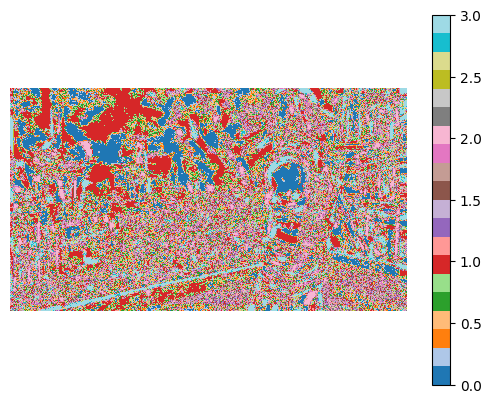

In [19]:
features=lbp_image.reshape(-1,1)
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=42)
labels=kmeans.fit_predict(features)
features=labels.reshape(image.shape)
plt.imshow(features,cmap="tab20")
plt.colorbar()
plt.axis('off')

(-0.5, 3871.5, 2591.5, -0.5)

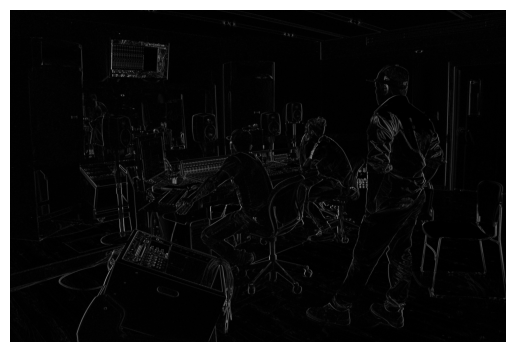

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread(r"C:\Users\deepe\Downloads\image.jpg",cv2.IMREAD_GRAYSCALE)
smooth=cv2.GaussianBlur(image,(5,5),1.4)
sobel_x=cv2.Sobel(smooth,cv2.CV_64F,1,0,ksize=3)
sobel_y=sobel_x=cv2.Sobel(smooth,cv2.CV_64F,1,0,ksize=3)
mag=cv2.magnitude(sobel_x,sobel_y)
dir=cv2.phase(sobel_x,sobel_y,angleInDegrees=True)
plt.imshow(mag,cmap='gray')
plt.axis('off')


(-0.5, 3871.5, 2591.5, -0.5)

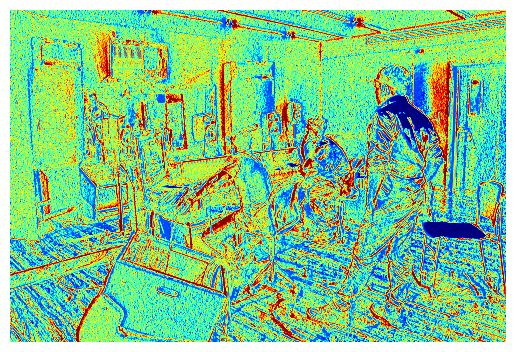

In [21]:
plt.imshow(dir,cmap='jet')
plt.axis('off')

(-0.5, 3871.5, 2591.5, -0.5)

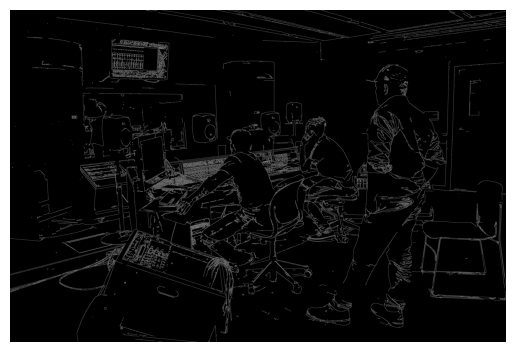

In [22]:
lt=50
ht=150
edges=cv2.Canny(image,lt,ht)
plt.imshow(edges,cmap='gray')
plt.axis('off')


Text(0.5, 1.0, 'Segementation')

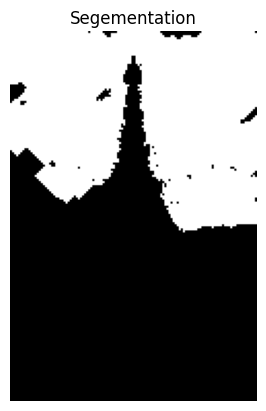

In [93]:
def reg_seg(image,seedpoint,threshold=15):
    h,w=image.shape
    region=[seedpoint]
    segmented=np.zeros((h,w),np.uint8)
    mean_intensity=int(image[seedpoint[0],seedpoint[1]])
    neighbour=[(-1,0),(1,0),(0,-1),(0,1)]
    while region:
        x,y=region.pop(0)
        segmented[x,y]=255
        for dx,dy in neighbour:
            nx,ny=x+dx,y+dy
            if 0<=nx<h and 0<=ny<w and segmented[nx,ny]==0:
                if abs(int(image[nx,ny])-mean_intensity)<threshold:
                    segmented[nx,ny]=255
                    region.append((nx,ny))
                    mean_intensity=(mean_intensity+int(image[nx,ny]))//2
    return segmented
image=cv2.imread(r"C:\Users\deepe\Downloads\img.jpg",cv2.IMREAD_GRAYSCALE)
seed=(50,50)
segmented_image=reg_seg(image,seed)
plt.imshow(segmented_image,cmap='gray')
plt.axis('off')
plt.title('Segementation')

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [86]:
data_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
dir=r"D:\horse-or-human"
train_data=data_gen.flow_from_directory(dir,subset='training',batch_size=32,target_size=(150,150),class_mode='binary')
test_data=data_gen.flow_from_directory(dir,subset='validation',batch_size=32,target_size=(150,150),class_mode='binary',shuffle=False)

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


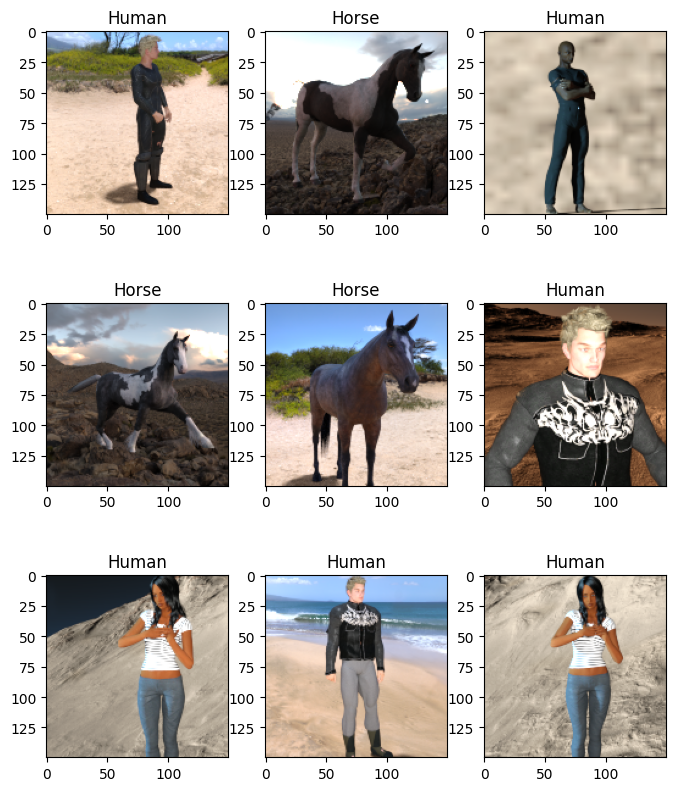

In [77]:
x,y=next(train_data)
plt.figure(figsize=(8,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i])
    plt.title("Human" if y[i]==1 else 'Horse')

In [66]:
data_gen_aug=ImageDataGenerator(rescale=1./255,validation_split=0.2,rotation_range=15,brightness_range=[0.8,1.2],vertical_flip=True,horizontal_flip=False)
train_data_aug=data_gen_aug.flow_from_directory(dir,subset='training',batch_size=32,target_size=(150,150),class_mode='binary')
test_data_aug=data_gen_aug.flow_from_directory(dir,subset='validation',batch_size=32,target_size=(150,150),class_mode='binary',shuffle=False)

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [87]:
def build_model(base_model,lr=0.001):
    model=Sequential([base_model,
                      Flatten(),
                      Dense(128,activation='relu'),
                      Dense(1,activation='sigmoid')])
    model.compile(Adam(learning_rate=lr),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [88]:
resnet=ResNet50(include_top=False,input_shape=(150,150,3),weights='imagenet')
resnet.trainable=False
resnet50=build_model(resnet)

In [89]:
history=resnet50.fit(train_data,epochs=2,validation_data=test_data)

Epoch 1/2
26/26 [==============================] - 90s 3s/step - loss: 1.2170 - accuracy: 0.5328 - val_loss: 0.6154 - val_accuracy: 0.5415
Epoch 2/2
26/26 [==============================] - 69s 3s/step - loss: 0.5107 - accuracy: 0.7932 - val_loss: 0.5419 - val_accuracy: 0.7951


In [90]:
resnet_aug=ResNet50(include_top=False,input_shape=(150,150,3),weights='imagenet')
resnet_aug.trainable=False
resnet50_aug=build_model(resnet_aug)
history_aug=resnet50_aug.fit(train_data_aug,epochs=2,validation_data=test_data_aug)

Epoch 1/2
26/26 [==============================] - 76s 3s/step - loss: 1.1489 - accuracy: 0.5182 - val_loss: 0.6719 - val_accuracy: 0.6146
Epoch 2/2
26/26 [==============================] - 66s 3s/step - loss: 0.6644 - accuracy: 0.6107 - val_loss: 0.6479 - val_accuracy: 0.8341


In [80]:
model=Sequential([Conv2D(32,(5,5),activation='relu',input_shape=(150,150,3)),
                  MaxPooling2D((2,2)),
                  Conv2D(64,(5,5),activation='relu'),
                  MaxPooling2D((2,2)),
                  Conv2D(64,(5,5),activation='relu'),
                  Flatten(),
                  Dense(128,activation='relu'),
                  Dense(1,activation='sigmoid')])
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history_cnn=model.fit(train_data,epochs=3,validation_data=test_data)


Epoch 1/3
26/26 [==============================] - 49s 2s/step - loss: 0.8694 - accuracy: 0.5718 - val_loss: 0.4237 - val_accuracy: 0.8683
Epoch 2/3
26/26 [==============================] - 39s 1s/step - loss: 0.2983 - accuracy: 0.8698 - val_loss: 0.2356 - val_accuracy: 0.8927
Epoch 3/3
26/26 [==============================] - 37s 1s/step - loss: 0.2155 - accuracy: 0.9112 - val_loss: 0.1820 - val_accuracy: 0.9317


In [81]:
model_aug=Sequential([Conv2D(32,(5,5),activation='relu',input_shape=(150,150,3)),
                  MaxPooling2D((2,2)),
                  Conv2D(64,(5,5),activation='relu'),
                  MaxPooling2D((2,2)),
                  Conv2D(64,(5,5),activation='relu'),
                  Flatten(),
                  Dense(128,activation='relu'),
                  Dense(1,activation='sigmoid')])
model_aug.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history_cnn_aug=model_aug.fit(train_data,epochs=3,validation_data=test_data)


Epoch 1/3
26/26 [==============================] - 64s 2s/step - loss: 0.5773 - accuracy: 0.7311 - val_loss: 0.1391 - val_accuracy: 0.9610
Epoch 2/3
26/26 [==============================] - 42s 2s/step - loss: 0.1920 - accuracy: 0.9355 - val_loss: 0.1296 - val_accuracy: 0.9415
Epoch 3/3
26/26 [==============================] - 44s 2s/step - loss: 0.0524 - accuracy: 0.9830 - val_loss: 0.1357 - val_accuracy: 0.9317


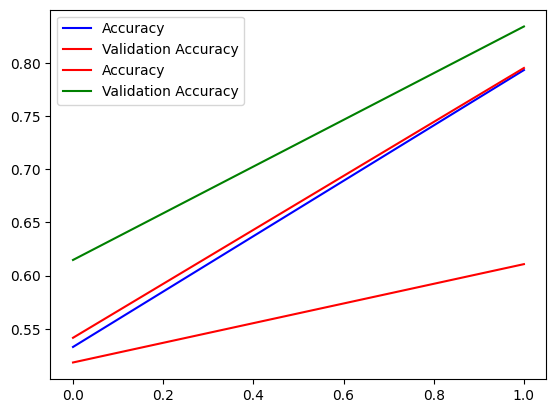

In [91]:
plt.plot(history.history['accuracy'],label='Accuracy',color='blue')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy',color='red')
plt.plot(history_aug.history['accuracy'],label='Accuracy',color='red')
plt.plot(history_aug.history['val_accuracy'],label='Validation Accuracy',color='green')
plt.legend()

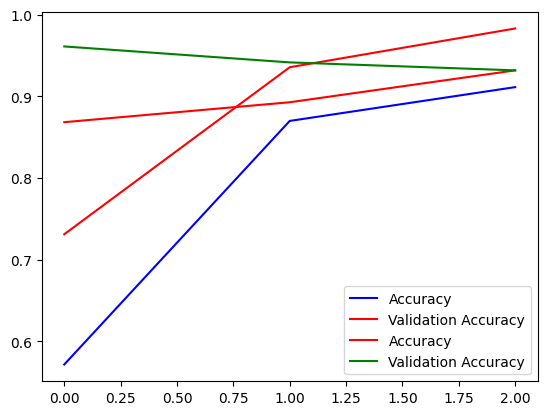

In [84]:
plt.plot(history_cnn.history['accuracy'],label='Accuracy',color='blue')
plt.plot(history_cnn.history['val_accuracy'],label='Validation Accuracy',color='red')
plt.plot(history_cnn_aug.history['accuracy'],label='Accuracy',color='red')
plt.plot(history_cnn_aug.history['val_accuracy'],label='Validation Accuracy',color='green')
plt.legend()